In [9]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
%matplotlib inline

shap.initjs()

In [10]:
data = pd.read_csv("Datasets/balanced_data.csv")

In [11]:
tfidf = TfidfVectorizer(ngram_range=(2, 3), stop_words='english')
X = tfidf.fit_transform(data['Preprocessed_Content'])

In [12]:
Y = data['Label']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty="l2", C=0.1, solver='lbfgs')
reg.fit(X_train, Y_train)


LogisticRegression(C=0.1)

In [16]:
import shap

feature_names = tfidf.get_feature_names_out()

masker = shap.maskers.Independent(X_train)
explainer = shap.Explainer(reg, masker, feature_names=feature_names)

X_small = X_test[:5]
shap_values = explainer(X_small)


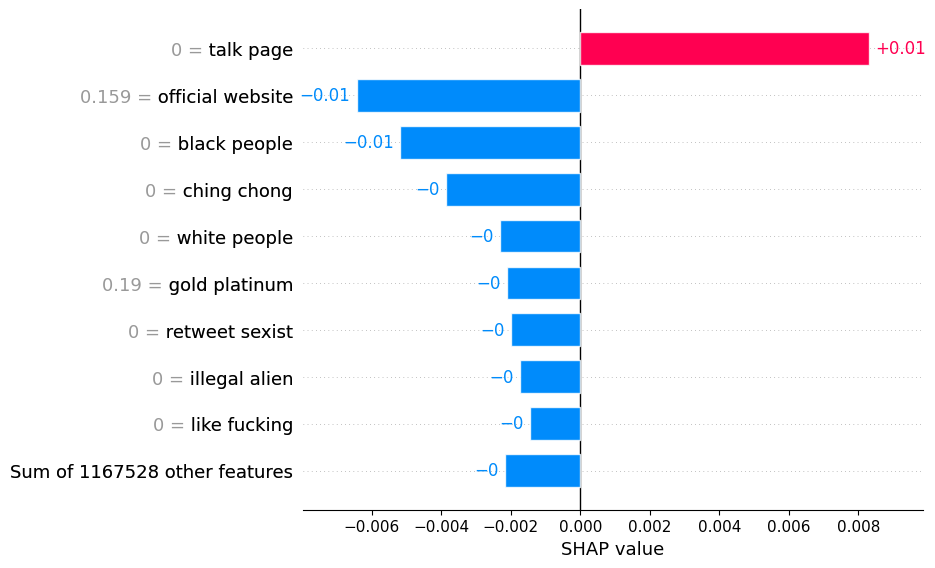

In [18]:
shap.plots.bar(shap_values[0])


In [21]:
for i in range(X_small.shape[0]):
    print(f"\nTop words for sample {i}:")
    word_impacts = zip(feature_names, shap_values[i].values)
    sorted_words = sorted(word_impacts, key=lambda x: abs(x[1]), reverse=True)
    for word, impact in sorted_words[:5]:  # top 5 words
        print(f"{word}: {impact:.4f}")


Top words for sample 0:
talk page: 0.0083
official website: -0.0064
black people: -0.0052
ching chong: -0.0039
white people: -0.0023

Top words for sample 1:
talk page: 0.0083
wait new: -0.0056
black people: -0.0052
ching chong: -0.0039
link website: -0.0035

Top words for sample 2:
talk page: 0.0083
black people: -0.0052
come wikipedia: -0.0050
ching chong: -0.0039
wikipedia review: -0.0032

Top words for sample 3:
talk page: -0.0616
feel free: -0.0331
internet protocol: -0.0202
people like: 0.0148
internet protocol address: -0.0113

Top words for sample 4:
reliable source: -0.0866
article mention: -0.0085
source support: -0.0084
talk page: 0.0083
black people: -0.0052
